In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from google.colab import drive
drive.mount('/content/drive')
drive_dir = '/content/drive/Shareddrives/Project2- Fraudulent Jobs/Data/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv(drive_dir + 'fake_job_postings.csv')

# **Data Cleanup**

In [ ]:
SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 25
# Set font sizes individually. For example, you may want the title
# to be very big, but the axes labels to be only medium size.
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [ ]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [ ]:
df['base_salary'] = df['salary_range'].str.split('-')

In [ ]:
df['base_salary'].isna().sum()

15012

In [ ]:
df.isna().sum()/len(df)

job_id                 0.000000
title                  0.000000
location               0.019351
department             0.645805
salary_range           0.839597
company_profile        0.185011
description            0.000056
requirements           0.150727
benefits               0.403244
telecommuting          0.000000
has_company_logo       0.000000
has_questions          0.000000
employment_type        0.194128
required_experience    0.394295
required_education     0.453300
industry               0.274217
function               0.361018
fraudulent             0.000000
base_salary            0.839597
dtype: float64

In [ ]:
df.dtypes

job_id                  int64
title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
base_salary            object
dtype: object

In [ ]:
#for col in df.columns:
  #print(col)
  #print(df[col].unique())
  #print('-----------------')

# **Industry Analysis**

In [ ]:
df_industry = df.groupby('industry').agg({'fraudulent':'sum', 'job_id':'count'})
df_industry = df_industry.reset_index()

df_industry = df_industry[df_industry['job_id'] >= 25]

df_industry['% fraud'] = (df_industry['fraudulent']/df_industry['job_id']) * 1000
df_industry['% job'] = df_industry['job_id']/len(df)

In [ ]:
df_industry = df_industry.sort_values(by='% fraud', ascending=False)
df_industry.head(10)

,industry,fraudulent,job_id,% fraud,% job
88,Oil & Energy,109,287,379.790941,0.016051
0,Accounting,57,159,358.490566,0.008893
67,"Leisure, Travel & Tourism",21,76,276.315789,0.004251
21,Computer Networking,12,44,272.727273,0.002461
52,Hospitality,14,88,159.090909,0.004922
107,Real Estate,24,175,137.142857,0.009787
49,"Health, Wellness and Fitness",15,127,118.110236,0.007103
76,Mechanical or Industrial Engineering,4,37,108.108108,0.002069
9,Biotechnology,4,38,105.263158,0.002125
51,Hospital & Health Care,51,497,102.615694,0.027796


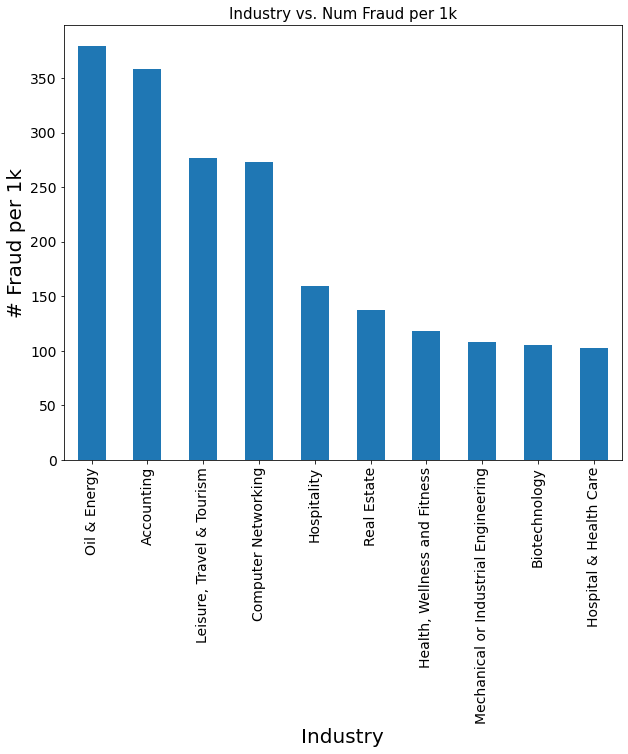

In [ ]:
df_industry[:10].plot(x='industry',
                 y='% fraud',
                 kind='bar',
                 xlabel='Industry',
                 ylabel='# Fraud per 1k',
                 title='Industry vs. Num Fraud per 1k',
                 legend=False, 
                 fontsize=14,
                 figsize=(10,8))

In [ ]:
df_industry = df_industry.sort_values(by='fraudulent', ascending=False)
df_industry.head(10)

,industry,fraudulent,job_id,% fraud,% job
88,Oil & Energy,109,287,379.790941,0.016051
0,Accounting,57,159,358.490566,0.008893
51,Hospital & Health Care,51,497,102.615694,0.027796
75,Marketing and Advertising,45,828,54.347826,0.046309
39,Financial Services,35,779,44.929397,0.043568
58,Information Technology and Services,32,1734,18.454441,0.096980
119,Telecommunications,26,342,76.023392,0.019128
107,Real Estate,24,175,137.142857,0.009787
26,Consumer Services,24,358,67.039106,0.020022
67,"Leisure, Travel & Tourism",21,76,276.315789,0.004251


# **Employment Type Analysis**

In [ ]:
df_employment_type = df.groupby('employment_type').agg({'fraudulent':'sum', 'job_id':'count'})
df_employment_type = df_employment_type.reset_index()

df_employment_type['% fraud'] = (df_employment_type['fraudulent']/df_employment_type['job_id']) * 1000
df_employment_type['% job'] = df_employment_type['job_id']/len(df)

In [ ]:
df_employment_type = df_employment_type.sort_values(by='% fraud', ascending=False)
df_employment_type

,employment_type,fraudulent,job_id,% fraud,% job
3,Part-time,74,797,92.848181,0.044575
2,Other,15,227,66.079295,0.012696
1,Full-time,490,11620,42.168675,0.649888
0,Contract,44,1524,28.871391,0.085235
4,Temporary,2,241,8.298755,0.013479


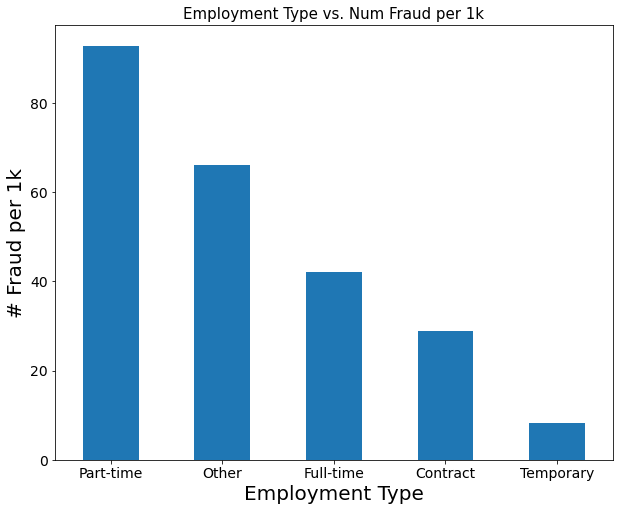

In [ ]:
df_employment_type.plot(x='employment_type',
                        y='% fraud',
                        kind='bar',
                        xlabel='Employment Type',
                        ylabel='# Fraud per 1k',
                        title='Employment Type vs. Num Fraud per 1k',
                        legend=False, 
                        fontsize=14,
                        rot=0,
                        figsize=(10,8))

In [ ]:
df_employment_type = df_employment_type.sort_values(by='fraudulent', ascending=False)
df_employment_type

,employment_type,fraudulent,job_id,% fraud,% job
1,Full-time,490,11620,42.168675,0.649888
3,Part-time,74,797,92.848181,0.044575
0,Contract,44,1524,28.871391,0.085235
2,Other,15,227,66.079295,0.012696
4,Temporary,2,241,8.298755,0.013479


# **Required Experience Analysis**

In [ ]:
df_required_experience = df.groupby('required_experience').agg({'fraudulent':'sum', 'job_id':'count'})
df_required_experience = df_required_experience.reset_index()

df_required_experience['% fraud'] = df_required_experience['fraudulent']/df_required_experience['job_id']
df_required_experience['% job'] = df_required_experience['job_id']/len(df)

In [ ]:
df_required_experience = df_required_experience.sort_values(by='% fraud', ascending=False)
df_required_experience

,required_experience,fraudulent,job_id,% fraud,% job
3,Executive,10,141,0.070922,0.007886
2,Entry level,179,2697,0.066370,0.150839
6,Not Applicable,60,1116,0.053763,0.062416
1,Director,17,389,0.043702,0.021756
5,Mid-Senior level,113,3809,0.029667,0.213031
4,Internship,10,381,0.026247,0.021309
0,Associate,42,2297,0.018285,0.128468


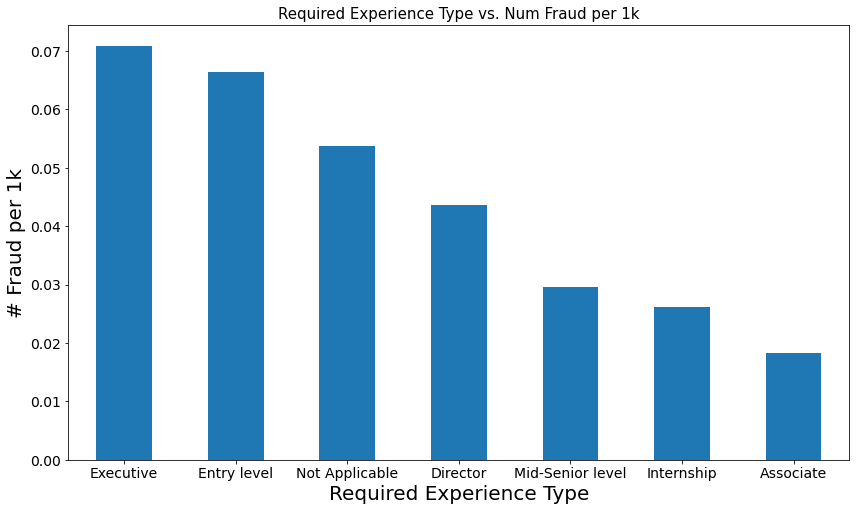

In [ ]:
df_required_experience.plot(x='required_experience',
                            y='% fraud',
                            kind='bar',
                            xlabel='Required Experience Type',
                            ylabel='# Fraud per 1k',
                            title='Required Experience Type vs. Num Fraud per 1k',
                            legend=False, 
                            fontsize=14,
                            rot=0,
                            figsize=(14,8))

In [ ]:
_df_required_experience = df_required_experience.sort_values(by='fraudulent', ascending=False)
df_required_experience

,required_experience,fraudulent,job_id,% fraud,% job
3,Executive,10,141,0.070922,0.007886
2,Entry level,179,2697,0.066370,0.150839
6,Not Applicable,60,1116,0.053763,0.062416
1,Director,17,389,0.043702,0.021756
5,Mid-Senior level,113,3809,0.029667,0.213031
4,Internship,10,381,0.026247,0.021309
0,Associate,42,2297,0.018285,0.128468


# **Required Education Analysis**

In [ ]:
df_required_education = df.groupby('required_education').agg({'fraudulent':'sum', 'job_id':'count'})
df_required_education = df_required_education.reset_index()

df_required_education['% fraud'] = (df_required_education['fraudulent']/df_required_education['job_id']) * 1000
df_required_education['% job'] = df_required_education['job_id']/len(df)

In [ ]:
df_required_education = df_required_education.sort_values(by='% fraud', ascending=False)
df_required_education.head(50)

,required_education,fraudulent,job_id,% fraud,% job
8,Some High School Coursework,20,27,740.740741,0.001510
2,Certification,19,170,111.764706,0.009508
4,High School or equivalent,170,2080,81.730769,0.116331
5,Master's Degree,31,416,74.519231,0.023266
6,Professional,4,74,54.054054,0.004139
9,Unspecified,61,1397,43.664996,0.078132
3,Doctorate,1,26,38.461538,0.001454
7,Some College Coursework Completed,3,102,29.411765,0.005705
0,Associate Degree,6,274,21.897810,0.015324
1,Bachelor's Degree,100,5145,19.436346,0.287752


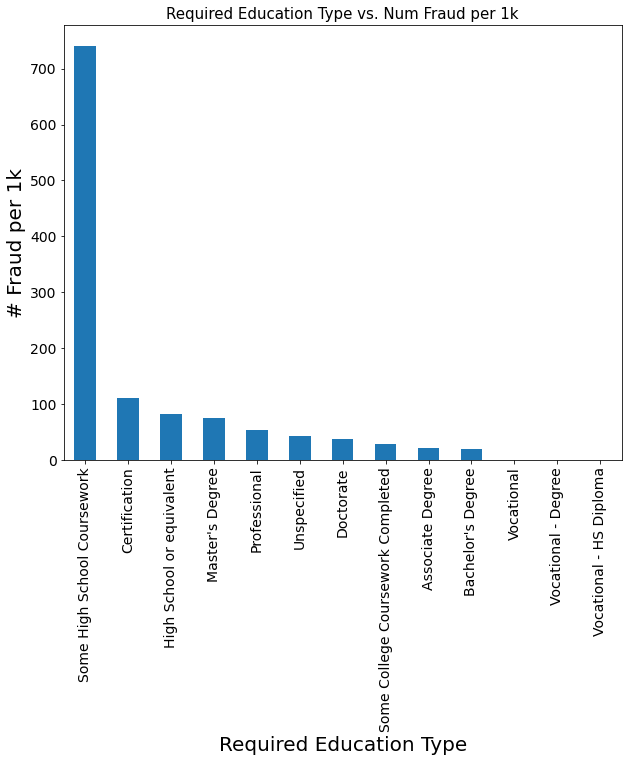

In [ ]:
df_required_education.plot(x='required_education',
                            y='% fraud',
                            kind='bar',
                            xlabel='Required Education Type',
                            ylabel='# Fraud per 1k',
                            title='Required Education Type vs. Num Fraud per 1k',
                            legend=False, 
                            fontsize=14,
                            figsize=(10,8))

In [ ]:
df_required_education = df_required_education.sort_values(by='fraudulent', ascending=False)
df_required_education.head(50)

,required_education,fraudulent,job_id,% fraud,% job
4,High School or equivalent,170,2080,81.730769,0.116331
1,Bachelor's Degree,100,5145,19.436346,0.287752
9,Unspecified,61,1397,43.664996,0.078132
5,Master's Degree,31,416,74.519231,0.023266
8,Some High School Coursework,20,27,740.740741,0.001510
2,Certification,19,170,111.764706,0.009508
0,Associate Degree,6,274,21.897810,0.015324
6,Professional,4,74,54.054054,0.004139
7,Some College Coursework Completed,3,102,29.411765,0.005705
3,Doctorate,1,26,38.461538,0.001454


# **Function Analysis**

In [ ]:
df_function = df.groupby('function').agg({'fraudulent':'sum', 'job_id':'count'})
df_function = df_function.reset_index()

df_function['% fraud'] = (df_function['fraudulent']/df_function['job_id']) 
df_function['% job'] = df_function['job_id']/len(df)

In [ ]:
df_function = df_function.sort_values(by='% fraud', ascending=False)
df_function.head(10)

,function,fraudulent,job_id,% fraud,% job
1,Administrative,119,630,0.188889,0.035235
14,Financial Analyst,5,33,0.151515,0.001846
0,Accounting/Auditing,29,212,0.136792,0.011857
10,Distribution,3,24,0.125000,0.001342
23,Other,32,325,0.098462,0.018177
13,Finance,15,172,0.087209,0.009620
12,Engineering,113,1348,0.083828,0.075391
5,Business Development,13,228,0.057018,0.012752
2,Advertising,5,90,0.055556,0.005034
26,Project Management,10,183,0.054645,0.010235


In [ ]:
df_function = df_function.sort_values(by='fraudulent', ascending=False)
df_function.head(10)

,function,fraudulent,job_id,% fraud,% job
1,Administrative,119,630,0.188889,0.035235
12,Engineering,113,1348,0.083828,0.075391
7,Customer Service,67,1229,0.054516,0.068736
31,Sales,41,1468,0.027929,0.082103
18,Information Technology,32,1749,0.018296,0.097819
23,Other,32,325,0.098462,0.018177
0,Accounting/Auditing,29,212,0.136792,0.011857
13,Finance,15,172,0.087209,0.009620
5,Business Development,13,228,0.057018,0.012752
22,Marketing,10,830,0.012048,0.046421


# **Location Analysis**

In [ ]:
df_location = df.groupby('location').agg({'fraudulent':'sum', 'job_id':'count'})
df_location = df_location.reset_index()

df_location['% fraud'] = (df_location['fraudulent']/df_location['job_id']) 
df_location['% job'] = df_location['job_id']/len(df)

In [ ]:
df_location = df_location.sort_values(by='% fraud', ascending=False)
df_location.head(10)

,location,fraudulent,job_id,% fraud,% job
2341,"US, ND, Abercrombie",1,1,1.0,0.000056
2287,"US, MT, Absarokee",2,2,1.0,0.000112
2156,"US, MI, DEARBORN",1,1,1.0,0.000056
2164,"US, MI, FLINT",1,1,1.0,0.000056
2203,"US, MI, Troy",1,1,1.0,0.000056
2210,"US, MN, 56073",1,1,1.0,0.000056
2219,"US, MN, Eagan",1,1,1.0,0.000056
2239,"US, MN, Rosemount",1,1,1.0,0.000056
2255,"US, MO, Grandview",1,1,1.0,0.000056
2264,"US, MO, Monett",1,1,1.0,0.000056


In [ ]:
df_location = df_location.sort_values(by='fraudulent', ascending=False)
df_location.head(10)

,location,fraudulent,job_id,% fraud,% job
2875,"US, TX, Houston",92,269,0.342007,0.015045
38,"AU, NSW, Sydney",31,82,0.378049,0.004586
1249,"US, ,",28,339,0.082596,0.018960
1412,"US, CA, Bakersfield",24,26,0.923077,0.001454
1487,"US, CA, Los Angeles",23,185,0.124324,0.010347
1579,"US, CA, San Mateo",22,46,0.478261,0.002573
2535,"US, NY, New York",20,658,0.030395,0.036801
1573,"US, CA, San Jose",14,48,0.291667,0.002685
2826,"US, TX, AUSTIN",14,14,1.000000,0.000783
2850,"US, TX, DALLAS",12,13,0.923077,0.000727


# **Benefits Keywords**

In [ ]:
df['benefits'].unique()

array([nan,
       'What you will get from usThrough being part of the 90 Seconds team you will gain:experience working on projects located around the world with an international brandexperience working with a variety of clients and on a large range of projectsopportunity to drive and grow production function and teama positive working environment with a great teamPay$40,000-$55,000Applying for this role with a VIDEOBeing a video business, we understand that one of the quickest ways that we can assess your suitability for this role, and one of the quickest ways that you can apply for it, is for you to submit a 60-90 second long video telling us about yourself, your experience and why you think you would be perfect for the role. \xa0It’s not about being a filmmaker or making a really creative video. \xa0A simple video filmed with a smart phone or web cam will be fine. Please also include where you are based and when you can start.You can upload the video onto YouTube or Vimeo (or simila

In [ ]:
# df_benefits = df['job_id', ]

In [ ]:
df['culture'] = df['benefits'].str.contains('culture') | df['benefits'].str.contains('Culture')
# Flexible, competitive pay, work-life balance, opportunities, growth, environment

In [ ]:
df['department_na'] = df['department'].isna()

In [ ]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,...,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,base_salary,culture,department_na
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,...,0,Other,Internship,NaN,NaN,Marketing,0,NaN,False,False
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,...,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,NaN,False,False
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,...,0,NaN,NaN,NaN,NaN,NaN,0,NaN,False,True
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,...,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,NaN,True,False
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,...,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,NaN,False,True


In [ ]:
df['culture'].sum()/len(df)

0.032885906040268455

In [ ]:
df['required_experience'].unique()

array(['Internship', 'Not Applicable', nan, 'Mid-Senior level',
       'Associate', 'Entry level', 'Executive', 'Director'], dtype=object)

In [ ]:
df['required_education'].unique()

array([nan, "Bachelor's Degree", "Master's Degree",
       'High School or equivalent', 'Unspecified',
       'Some College Coursework Completed', 'Vocational', 'Certification',
       'Associate Degree', 'Professional', 'Doctorate',
       'Some High School Coursework', 'Vocational - Degree',
       'Vocational - HS Diploma'], dtype=object)

In [ ]:
df_fraud = df.groupby('fraudulent').agg({'job_id':'count'})
df_fraud['fraud_1k'] = df_fraud['job_id']/len(df)
df_fraud = df_fraud.reset_index()
df_fraud

,fraudulent,job_id,fraud_1k
0,0,17014,0.951566
1,1,866,0.048434


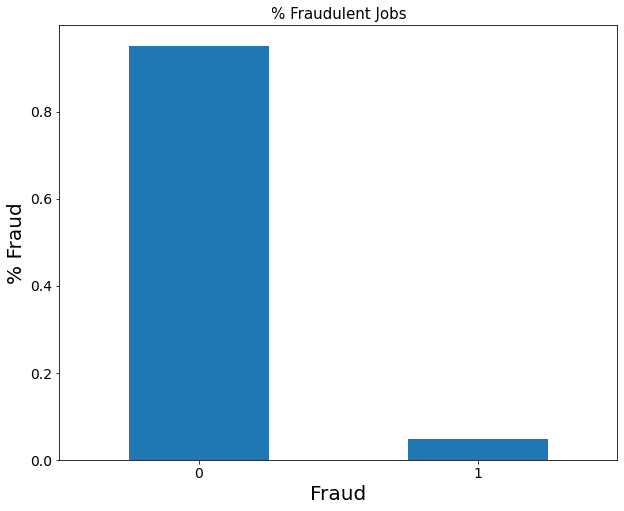

In [ ]:
df_fraud.plot(x='fraudulent',
              y='fraud_1k',
              kind='bar',
              xlabel='Fraud',
              ylabel='% Fraud',
              title='% Fraudulent Jobs',
              legend=False, 
              fontsize=14,
              rot=0,
              figsize=(10,8))

# **Company Logo Analysis**

In [ ]:
df_company_logo = df.groupby('has_company_logo').agg({'fraudulent':'sum', 'job_id':'count'})

df_company_logo['% fraud'] = (df_company_logo['fraudulent']/df_company_logo['job_id']) * 10000

df_company_logo

,fraudulent,job_id,% fraud
has_company_logo,,,
0,583,3660,1592.896175
1,283,14220,199.015471


In [ ]:
df['is_fraud_industry'] = (df['industry'] == 'Oil & Energy') | (df['industry'] == 'Accounting') | (df['industry'] == 'Leisure, Travel & Tourism') | (df['industry'] == 'Computer Networking') | (df['industry'] == 'Hospitality') | (df['industry'] == 'Real Estate') | (df['industry'] == 'Health, Wellness and Fitness') | (df['industry'] == 'Mechanical or Industrial Engineering') | (df['industry'] == 'Leisure, Travel & Tourism') | (df['industry'] == 'Computer Networking') | (df['industry'] == 'Hospitality') | (df['industry'] == 'Real Estate') | (df['industry'] == 'Health, Wellness and Fitness') | (df['industry'] == 'Mechanical or Industrial Engineering') | (df['industry'] == 'Biotechnology') | (df['industry'] == 'Hospital & Health Care')


In [ ]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,...,employment_type,required_experience,required_education,industry,function,fraudulent,base_salary,culture,department_na,is_fraud_industry
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,...,Other,Internship,NaN,NaN,Marketing,0,NaN,False,False,False
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,...,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,NaN,False,False,False
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,False,True,False
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,...,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,NaN,True,False,False
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,...,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,NaN,False,True,True


In [ ]:
df['is_part_time'] = df['employment_type'] == 'Part-time'

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_df, test_df = train_test_split(df, test_size=0.3)

X_train = train_df[['is_part_time', 'is_fraud_industry']]
y_train = train_df['fraudulent']

X_test = test_df[['is_part_time', 'is_fraud_industry']]
y_test = test_df['fraudulent']


In [ ]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression()

# Training my model
logr.fit(X_train,y_train)

# Predictions using only the testing data
preds = logr.predict(X_test)

In [ ]:
logr_proba_preds = logr.predict_proba(X_test)[:, 1]

In [ ]:
y_test.value_counts(normalize=True)

0    0.950037
1    0.049963
Name: fraudulent, dtype: float64

In [ ]:
from sklearn.metrics import classification_report

# Classification_report wants the correct labels first, followed by the predictions.
# You should always use print to display it, otherwise it will look bad
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5096
           1       0.00      0.00      0.00       268

    accuracy                           0.95      5364
   macro avg       0.48      0.50      0.49      5364
weighted avg       0.90      0.95      0.93      5364



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, preds, normalize='true')

array([[1., 0.],
       [1., 0.]])

In [ ]:
len(df['description'])

17880

# This code is the code that deals with textual features 

In [ ]:
#make a new df 
new_df=df[['description','company_profile','requirements','benefits']]

In [ ]:
new_df['description_n']= new_df['description'].str.len()

<ipython-input-217-ea1481bfe6e5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['description_n']= new_df['description'].str.len()


In [ ]:
new_df.head()

,description,company_profile,requirements,benefits,description_n
0,"Food52, a fast-growing, James Beard Award-winn...","We're Food52, and we've created a groundbreaki...",Experience with content management systems a m...,NaN,905.0
1,Organised - Focused - Vibrant - Awesome!Do you...,"90 Seconds, the worlds Cloud Video Production ...",What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,2077.0
2,"Our client, located in Houston, is actively se...",Valor Services provides Workforce Solutions th...,Implement pre-commissioning and commissioning ...,NaN,355.0
3,THE COMPANY: ESRI – Environmental Systems Rese...,Our passion for improving quality of life thro...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,2600.0
4,JOB TITLE: Itemization Review ManagerLOCATION:...,SpotSource Solutions LLC is a Global Human Cap...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,1520.0


In [ ]:
#convert the string to a lenght of a string 

In [ ]:
new_df['company_profile_n']= df['company_profile'].str.len()
new_df['requirements_n']= df['requirements'].str.len()
new_df['benefits_n'] = df['benefits'].str.len()
new_df['fraudulent'] =df['fraudulent']

<ipython-input-219-1a2b8ef4e664>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['company_profile_n']= df['company_profile'].str.len()
<ipython-input-219-1a2b8ef4e664>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['requirements_n']= df['requirements'].str.len()
<ipython-input-219-1a2b8ef4e664>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

In [ ]:
new_df = new_df.fillna(0)

# Fill Na so that the regession can work

In [ ]:
#cheking to see if it was succefull 
new_df.head()

,description,company_profile,requirements,benefits,description_n,company_profile_n,requirements_n,benefits_n,fraudulent
0,"Food52, a fast-growing, James Beard Award-winn...","We're Food52, and we've created a groundbreaki...",Experience with content management systems a m...,0,905.0,885.0,852.0,0.0,0
1,Organised - Focused - Vibrant - Awesome!Do you...,"90 Seconds, the worlds Cloud Video Production ...",What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,2077.0,1286.0,1433.0,1292.0,0
2,"Our client, located in Houston, is actively se...",Valor Services provides Workforce Solutions th...,Implement pre-commissioning and commissioning ...,0,355.0,879.0,1363.0,0.0,0
3,THE COMPANY: ESRI – Environmental Systems Rese...,Our passion for improving quality of life thro...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,2600.0,614.0,1429.0,782.0,0
4,JOB TITLE: Itemization Review ManagerLOCATION:...,SpotSource Solutions LLC is a Global Human Cap...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,1520.0,1628.0,757.0,21.0,0


Training data into a 50/50 split from non fraud and fraud so the model can work better

In [ ]:
fraudulent_df = new_df[new_df['fraudulent'] == True]
train_fraud, test_fraud = train_test_split(fraudulent_df, train_size=0.7)
num_fraudulent = len(train_fraud) # 100

nonfraud_df = new_df[new_df['fraudulent'] == False]
train_nonfraud, test_nonfraud = train_test_split(nonfraud_df, train_size=num_fraudulent)

train_df = pd.concat([train_fraud, train_nonfraud])
test_df = pd.concat([test_fraud, test_nonfraud])

In [ ]:
#ntrain_df, ntest_df = train_test_split(new_df, test_size=0.3)
X_train_n = train_df[['description_n','company_profile_n','requirements_n','benefits_n']]
y_train_n = train_df['fraudulent']

X_test_n = test_df[['description_n','company_profile_n','requirements_n','benefits_n']]
y_test_n = test_df['fraudulent']

# Fitting the model 

In [ ]:
from sklearn.linear_model import LogisticRegression

lrn = LogisticRegression()

# Training my model
lrn.fit(X_train_n,y_train_n)

# Predictions using only the testing data
preds_n = lrn.predict(X_test_n)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test_n, preds_n))

              precision    recall  f1-score   support

           0       0.99      0.63      0.77     16408
           1       0.03      0.73      0.06       260

    accuracy                           0.63     16668
   macro avg       0.51      0.68      0.42     16668
weighted avg       0.98      0.63      0.76     16668



In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test_n, preds_n, normalize='true')

array([[0.63109459, 0.36890541],
       [0.26923077, 0.73076923]])

# Getting graphs to show how we got to the end of the model 

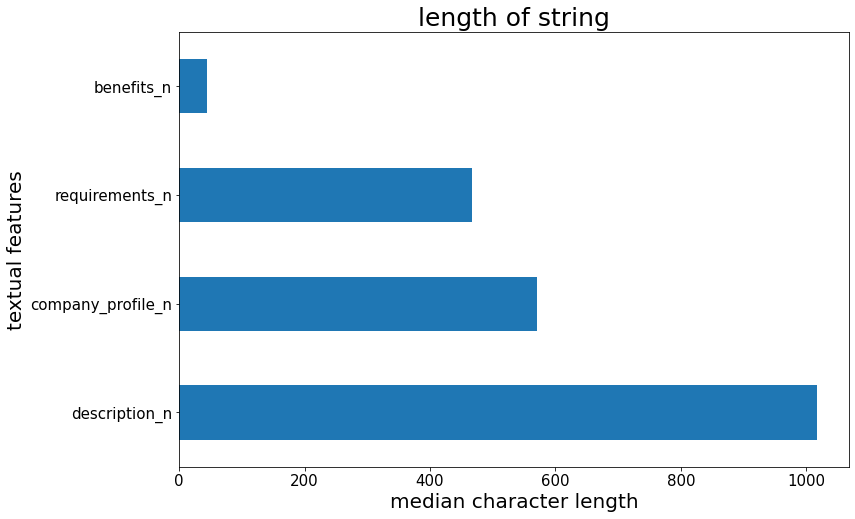

In [ ]:
new_df[['description_n','company_profile_n','requirements_n','benefits_n']].median().plot.barh(figsize=(12,8))
plt.xlabel('median character length', fontsize = 20)
plt.ylabel('textual features', fontsize = 20)
plt.title('length of string', fontsize = 25)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

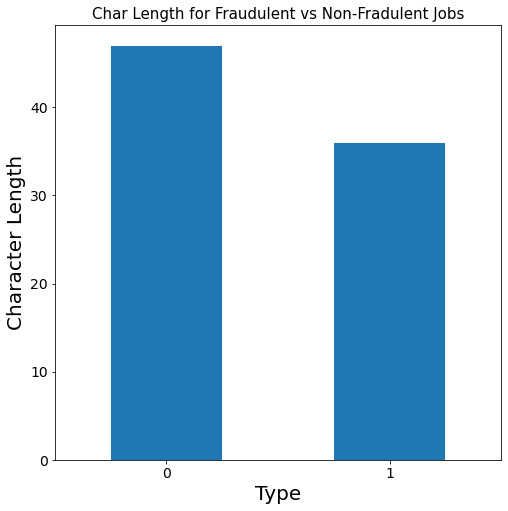

In [ ]:
df_benefits = new_df.groupby('fraudulent').agg({'benefits_n':'median'})
df_benefits = df_benefits.reset_index()
df_benefits.plot(x='fraudulent',
                y='benefits_n',
                kind='bar',
                xlabel='Type',
                ylabel='Character Length',
                title='Char Length for Fraudulent vs Non-Fradulent Jobs',
                legend=False, 
                fontsize=14,
                rot=0,
                figsize=(8,8))

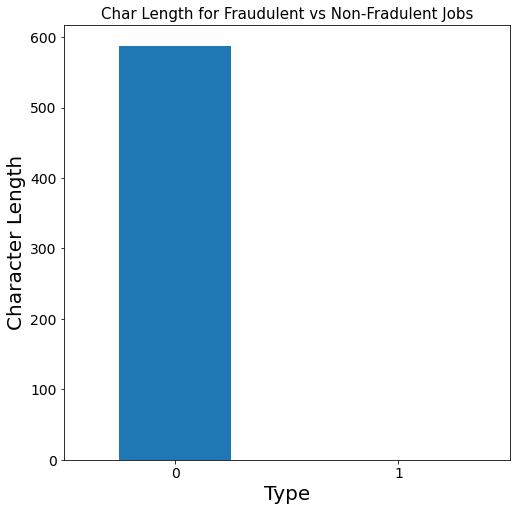

In [ ]:
df_company_profile = new_df.groupby('fraudulent').agg({'company_profile_n':'median'})
df_company_profile = df_company_profile.reset_index()
df_company_profile.plot(x='fraudulent',
                y='company_profile_n',
                kind='bar',
                xlabel='Type',
                ylabel='Character Length',
                title='Char Length for Fraudulent vs Non-Fradulent Jobs',
                legend=False, 
                fontsize=14,
                rot=0,
                figsize=(8,8))

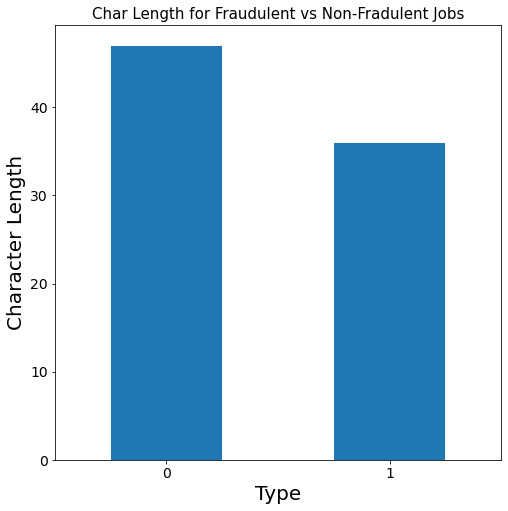

In [ ]:
df_benefit = new_df.groupby('fraudulent').agg({'benefits_n':'median'})
df_benefit = df_benefit.reset_index()
df_benefit.plot(x='fraudulent',
                y='benefits_n',
                kind='bar',
                xlabel='Type',
                ylabel='Character Length',
                title='Char Length for Fraudulent vs Non-Fradulent Jobs',
                legend=False, 
                fontsize=14,
                rot=0,
                figsize=(8,8))